In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [10]:
df = pd.read_csv('data/calls_weather_tfk.csv')

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [12]:
df.set_index(df['DATE'], inplace = True)

In [14]:
df

,Unnamed: 0,year,month,day,hour,num_calls,BRONX,BROOKLYN,MANHATTAN,QUEENS,...,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TAVG_CALC,Incidences
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-02,0,2010,1,2,2,93,25,23,20,20,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-02,0.02,0.2,0.0,34.0,17.0,25.5,1
2010-01-02,1,2010,1,2,3,88,22,28,19,15,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-02,0.02,0.2,0.0,34.0,17.0,25.5,1
2010-01-03,2,2010,1,3,12,144,43,42,33,26,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-03,0.00,0.0,0.0,22.0,17.0,19.5,1
2010-01-04,3,2010,1,4,1,94,23,34,20,11,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-04,0.00,0.0,0.0,30.0,19.0,24.5,2
2010-01-04,4,2010,1,4,10,219,53,67,54,34,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-04,0.00,0.0,0.0,30.0,19.0,24.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-23,25236,2016,8,23,20,221,59,59,50,44,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-08-23,0.00,0.0,0.0,82.0,61.0,71.5,13
2016-08-23,25237,2016,8,23,21,213,51,55,55,44,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-08-23,0.00,0.0,0.0,82.0,61.0,71.5,8
2016-08-23,25238,2016,8,23,22,176,54,44,42,29,...,USW00094728,"NY CITY CENTRAL PARK, NY US",2016-08-23,0.00,0.0,0.0,82.0,61.0,71.5,11


In [13]:
X = df.drop(columns = ['num_calls', 'BROOKLYN', 'BRONX' ,'MANHATTAN', 
                       'UNKNOWN','Unnamed: 0', 'RICHMOND / STATEN ISLAND'
                       ])
y = df['num_calls']

X = pd.get_dummies(X, columns = ['STATION'])
X = pd.get_dummies(X, columns = ['NAME'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[int64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [26]:
X.shape

(25241, 14)

In [27]:
stop = EarlyStopping(monitor = 'mae', patience = 10, min_delta = .01)

# set up structure
model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (14,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1, activation = None))

# compile
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

results = model.fit(X_train_sc, y_train, 
          epochs = 100,
          batch_size = 256,
          validation_data = (X_test_sc, y_test),
          callbacks = stop,
                   verbose = 1)

Epoch 1/100
74/74 [==============================] - 1s 5ms/step - loss: 18618.5230 - mae: 126.4864 - val_loss: 4420.1313 - val_mae: 56.2690
Epoch 2/100
74/74 [==============================] - 0s 3ms/step - loss: 2490.3167 - mae: 39.1785 - val_loss: 1194.7771 - val_mae: 26.5850
Epoch 3/100
74/74 [==============================] - 0s 3ms/step - loss: 1056.3414 - mae: 25.1741 - val_loss: 919.7314 - val_mae: 23.3338
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 862.2387 - mae: 22.7331 - val_loss: 795.5580 - val_mae: 21.7113
Epoch 5/100
74/74 [==============================] - 0s 3ms/step - loss: 746.3710 - mae: 21.2264 - val_loss: 716.1863 - val_mae: 20.6549
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 682.1461 - mae: 20.3629 - val_loss: 657.5544 - val_mae: 19.9224
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 632.5542 - mae: 19.6656 - val_loss: 620.3171 - val_mae: 19.4443
Epoch 8/100
74/74 [===============

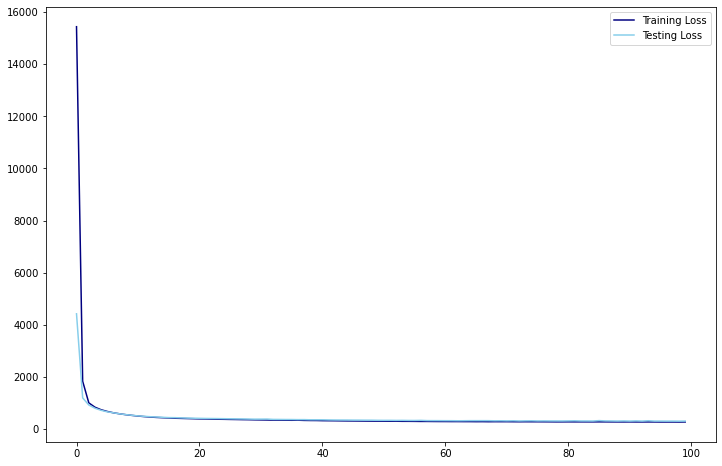

In [28]:
train_mae = results.history['loss']
test_mae =  results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_mae, label='Training Loss', color='navy')
plt.plot(test_mae, label='Testing Loss', color='skyblue')
plt.legend();